In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:


df['Age'] = df['Age'].fillna(df['Age'].median())


if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


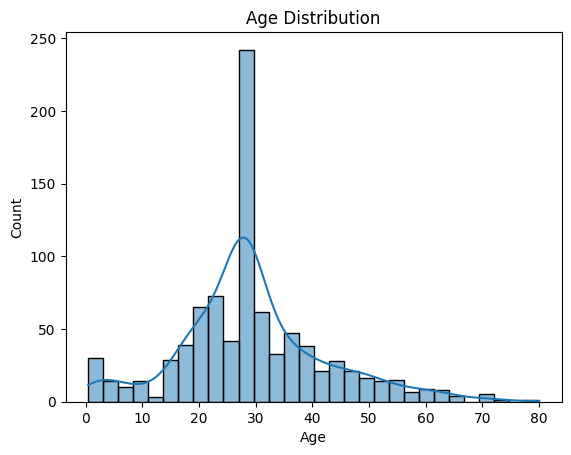

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


Observation:
Most passengers were between 20 to 40 years old. The distribution is slightly right-skewed, with fewer older passengers above age 60.


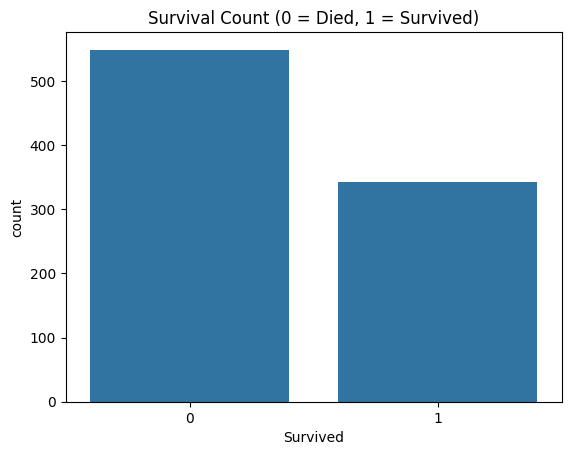

In [ ]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()


Observation:
More passengers died than survived. Around 38% of the passengers survived, while approximately 62% did not.


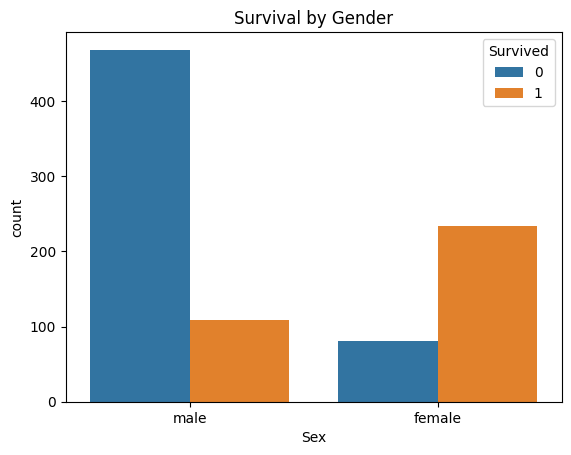

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()


Observation:
Female passengers had a significantly higher survival rate compared to males. Most male passengers did not survive.


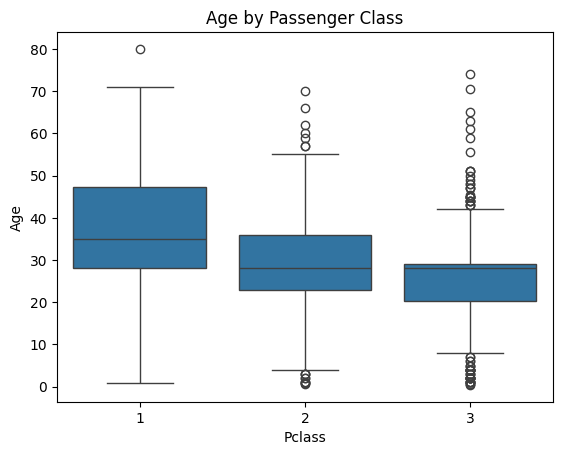

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age by Passenger Class")
plt.show()


Observation:
First-class passengers tend to be older, while third-class passengers include a wider range of younger people. Median age decreases from class 1 to 3.


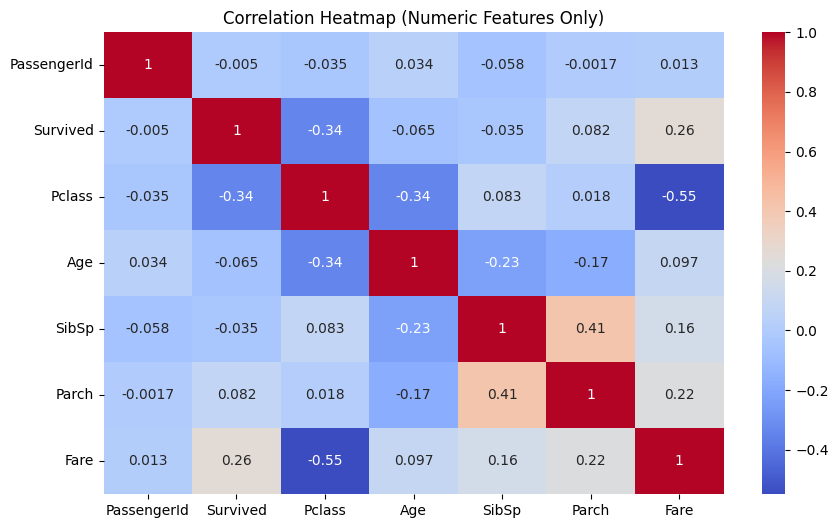

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()



Observation:  
The heatmap reveals that Fare has a **positive correlation** with Survival — passengers who paid higher fares were more likely to survive. Pclass shows a **negative correlation** with Survival — lower class (higher Pclass number) passengers had lower chances of survival. Other features like Age and SibSp have weak correlati


Summary of EDA Findings

- Gender:Female passengers had a much higher survival rate than males, highlighting a strong gender bias in survival.

- Class: First-class passengers had significantly better survival chances, indicating socio-economic status influenced outcomes.

- Age: Most passengers were between 20–40 years old. Younger passengers and children had slightly better survival chances.

- Fare:Passengers who paid higher fares were more likely to survive. Fare showed a positive correlation with survival.

- Embarked Port:Most passengers boarded at Southampton (S), but those who boarded at Cherbourg (C) had relatively higher survival rates.

- Missing Values: Missing values in Age and Embarked were handled using median and mode. Cabin was dropped due to excessive nulls.

- Correlation: Pclass showed a strong negative correlation with Survival, while Fare showed a positive correlation. No signs of multicollinearity among numeric features.

Overall, the analysis indicates that gender, passenger class, and fare are key factors associated with survival on the Titanic.
